In [1]:
# Jupyter Notebook: User Study Evaluation Analysis

# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the Dataset
df = pd.read_csv("user_study_evaluation/user-study-User Study evaluation.csv", delimiter=';')
df.head()

# Step 3: Clean the Data
# Convert Task 2 Rankings to numeric values, ignoring non-numeric values
df['Task 2: Ranking L1'] = pd.to_numeric(df['Task 2: Ranking L1'], errors='coerce')
df['Task 2: Ranking L2'] = pd.to_numeric(df['Task 2: Ranking L2'], errors='coerce')

# Step 4: Preferred List Analysis - Pie Chart
combined_preferences = pd.concat([df['Task 2: Preferred List'],df['Task 1: Preferred List']]).value_counts()
combined_preferences.to_csv("user-study-list-preference-combined.csv")
combined_preferences

2    17
1     3
Name: count, dtype: int64

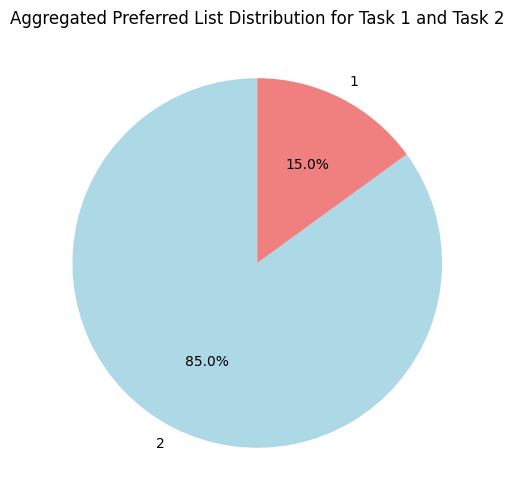

In [2]:
plt.figure(figsize=(6, 6))
combined_preferences.plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
plt.title("Aggregated Preferred List Distribution for Task 1 and Task 2")
plt.ylabel("")  # Remove y-axis label for clarity
plt.show()



In [3]:

# Step 5: Ranking Analysis - Histograms
# Filter out missing values in rankings
ranking_l1 = df['Task 2: Ranking L1'].dropna()
ranking_l2 = df['Task 2: Ranking L2'].dropna()


print(f"Ranking 1 Mean: {ranking_l1.mean()}, Ranking 2 Mean: {ranking_l2.mean()}, Average Rank Deviation: {ranking_l1.mean() - ranking_l2.mean()}")

df[['Task 2: Ranking L1',  'Task 2: Ranking L2']].to_csv("user-study-ranking.csv")

Ranking 1 Mean: 10.777777777777779, Ranking 2 Mean: 1.8888888888888888, Average Rank Deviation: 8.88888888888889


In [4]:
ranks_l2 = df['Task 2: Ranking L2'].value_counts()
# TODO for each list provide count of ranks 1 - 10+(NAN)
ranks_l1 = df['Task 2: Ranking L1'].value_counts()

print(ranks_l1)
print(ranks_l2)

Task 2: Ranking L1
1.0     2
9.0     2
5.0     1
14.0    1
3.0     1
25.0    1
30.0    1
Name: count, dtype: int64
Task 2: Ranking L2
1.0    5
2.0    2
4.0    2
Name: count, dtype: int64


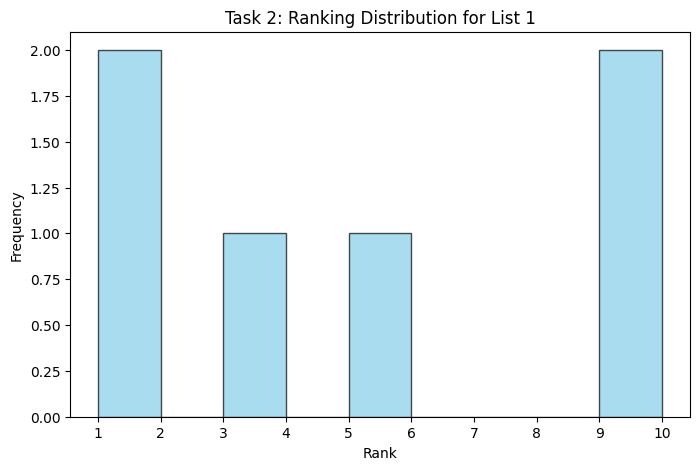

In [5]:

# Plot Histogram for Task 2 Rankings (List 1)
plt.figure(figsize=(8, 5))
plt.hist(ranking_l1, bins=range(1, 11), alpha=0.7, color='skyblue', edgecolor='black')
plt.title("Task 2: Ranking Distribution for List 1")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.xticks(range(1, 11))  # Ensure all ranks are displayed
plt.show()

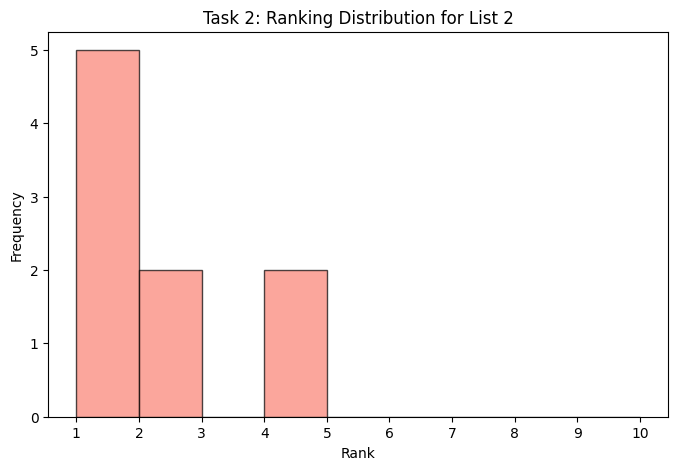

In [6]:

# Plot Histogram for Task 2 Rankings (List 2)
plt.figure(figsize=(8, 5))
plt.hist(ranking_l2, bins=range(1, 11), alpha=0.7, color='salmon', edgecolor='black')
plt.title("Task 2: Ranking Distribution for List 2")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.xticks(range(1, 11))  # Ensure all ranks are displayed
plt.show()

# SUS-Test-Evaluation

In [10]:
df = pd.read_csv("user_study_evaluation/sus-test-Table 1.csv", delimiter=';')


# Calculate the mean for each question
df['Mean'] = df.iloc[:, 1:].mean(axis=1)
# Display the DataFrame to the user
df_mean_scores = df[["Question", "Mean"]]
df_normalized_scores = 6 - df.loc[1, 3, 5, 7, 9, "Mean"]
df_mean_scores.to_csv("sus-scores.csv")
df_normalized_scores

IndexingError: Too many indexers

In [8]:
# Define SUS calculation function
def calculate_sus_score(row):
    # Questions: [1, 3, 5, 7, 9] are positive, and [2, 4, 6, 8, 10] are negative
    positive_scores = row[[0, 2, 4, 6, 8]] - 1
    negative_scores = 5 - row[[1, 3, 5, 7, 9]]
    return (positive_scores.sum() + negative_scores.sum()) * 2.5

# Apply SUS calculation for each user
sus_scores = df.iloc[:, 1:].apply(calculate_sus_score, axis=0)

# Display SUS Scores
sus_scores_df = pd.DataFrame(sus_scores, columns=['SUS Score'])
sus_scores_filtered = sus_scores_df[sus_scores_df['SUS Score'] != 0]
sus_scores_filtered.mean()

0    3
2    4
4    3
6    4
8    2
Name: 1, dtype: int64
1    3
3    4
5    3
7    4
9    4
Name: 1, dtype: int64
0    3
2    3
4    4
6    4
8    3
Name: 2, dtype: int64
1    4
3    4
5    3
7    4
9    4
Name: 2, dtype: int64
0    4
2    3
4    3
6    4
8    3
Name: 3, dtype: int64
1    4
3    4
5    4
7    4
9    3
Name: 3, dtype: int64
0    3
2    4
4    4
6    4
8    3
Name: 4, dtype: int64
1    4
3    4
5    3
7    4
9    4
Name: 4, dtype: int64
0    3
2    3
4    4
6    4
8    2
Name: 5, dtype: int64
1    4
3    4
5    4
7    1
9    4
Name: 5, dtype: int64
0    3
2    3
4    2
6    4
8    2
Name: 6, dtype: int64
1    4
3    4
5    2
7    4
9    4
Name: 6, dtype: int64
0    3
2    1
4    4
6    4
8    1
Name: 7, dtype: int64
1    3
3    3
5    1
7    2
9    4
Name: 7, dtype: int64
0    4
2    3
4    3
6    4
8    2
Name: 8, dtype: int64
1    3
3    3
5    3
7    4
9    4
Name: 8, dtype: int64
0    4
2    4
4    4
6    3
8    2
Name: 9, dtype: int64
1    3
3    4
5    3
7    4
9  

SUS Score    84.5
dtype: float64

In [9]:
sus_scores_df

,SUS Score
1,85.0
2,90.0
3,90.0
4,92.5
5,82.5
6,80.0
7,65.0
8,82.5
9,87.5
10,90.0
